# Predictive Analysis To Predict Diagnosis of a Breast Tumor
____________________________________________________________________

## **1. Problem Statement**

Breast cancer remains one of the most prevalent and potentially life-threatening diseases affecting women worldwide. Early detection and accurate diagnosis are critical for effective treatment and improved patient outcomes. In this context, predictive analysis techniques offer valuable tools for identifying patterns and risk factors associated with breast cancer diagnosis.

A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound, and biopsy are commonly used to diagnose breast cancer performed.

The objective of this project is to develop a predictive model capable of accurately classifying breast tumors as malignant or benign based on clinical and diagnostic features. By leveraging machine learning algorithms and statistical techniques, we aim to build a robust and reliable model that can assist healthcare professionals in making informed decisions regarding patient care and treatment strategies.

### 1.1 Expected Outcome
The project aims to develop a highly accurate predictive model for classifying breast tumors as malignant or benign based on clinical and diagnostic features. Leveraging machine learning and statistical techniques, the model will assist healthcare professionals in making informed decisions about patient care and treatment strategies.

Given breast cancer results from breast fine-needle aspiration (FNA) test, the model will classify tumors using two training classifications:

- 1 = Malignant (Cancerous) - Present
- 0 = Benign (Not Cancerous) - Absent

This approach will enable earlier detection, personalized treatment planning, and improved patient outcomes, ultimately reducing the burden of breast cancer on individuals and healthcare systems.


### 1.2 Objective

Given the discrete labels in the dataset representing two categories - Malignant or benign, the problem at hand is a classification task in machine learning. Our goal is to develop a model that accurately classifies breast tumors as either benign or malignant and predicts the recurrence and non-recurrence of malignant cases after a certain period.

To achieve this objective, we employ machine learning classification methods to fit a function that can effectively predict the discrete class of new input data. By leveraging features such as demographic information, clinical characteristics, and diagnostic test results, our model aims to provide healthcare professionals with valuable insights for early detection, personalized treatment planning, and improved patient outcomes.

### 1.3 Data Sources

The [Breast Cancer Dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) is available as machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M = malignant, B = benign), respectively.

The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

**Getting Started: Load libraries and set options**

In [ ]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)

# Read the file "data.csv" and print the contents.
df = pd.read_csv(r"C:\Users\KIIT\Desktop\Notes\sixth semester\Minor Project\Datasets\Data_cleaned.csv", index_col=False)

## Load Dataset

Firstly, load the supplied CSV file using additional options in the Pandas `read_csv` function.

### Inspecting the data

To begin analyzing the data, let's first load the supplied CSV file using additional options available in the Pandas read_csv function. After loading the data, we'll inspect it visually. There are a couple of ways to do this:

- Using `head()` method: This method allows us to view the first few records of the DataFrame. By default, `data.head()` returns the first 5 rows of the DataFrame object df (excluding the header row).-

- Using `tail()` method: Similar to `head()`, this method enables us to view the last few records of the DataFrame. By default, `data.tail()` returns the last 5 rows of the DataFrame.

Both `head()` and `tail()` methods accept an optional argument to specify the number of records to display. We can include the desired number within the parentheses when calling either method. This provides flexibility in inspecting the data according to our needs.


In [ ]:
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\Notes\sixth semester\Minor Project\Datasets\data_clean_id.csv", index_col=False)
# Id column is redundant and not useful, we want to drop it
df.drop('id', axis =1, inplace=True)
# df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
df.shape

(569, 32)

In the result displayed, you can see the data has 569 records, each with 32 columns.

The `info()` method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

The method `get_dtype_counts()` will return the number of columns of each type in a DataFrame:

In [ ]:
#Review data types with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Check for missing variables
df.isnull().any()

Unnamed: 0                 False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them

## **Exploratory Data Analysis**

In this section, we'll delve deeper into the attributes and data values to gain a better understanding of the dataset. By getting familiar with the data, we'll gather valuable insights that will aid us in the subsequent data pre-processing steps.

## 2.1 Objectives of Data Exploration

Exploratory Data Analysis (EDA) is a crucial step in the data analysis pipeline, occurring after data acquisition and feature engineering but before modeling. It's essential because it allows data scientists to understand the underlying nature of the data without making assumptions. Through EDA, we gain insights into the data's structure, value distributions, presence of outliers, and interrelationships among variables.

The purpose of EDA is twofold:

- To utilize summary statistics and visualizations to gain a deeper understanding of the data, identify patterns, assess data quality, and formulate hypotheses for further analysis.
- To provide an overall picture of the data, enabling successful data preprocessing. Basic statistical descriptions help identify data properties and outliers that may need treatment.

The next step involves exploring the data using two approaches:
- **Descriptive statistics**: This involves condensing key characteristics of the dataset into simple numeric metrics such as mean, standard deviation, and correlation.
-**Visualization**: This entails projecting the data or parts of it into Cartesian space or abstract images. Data exploration through visualization plays a crucial role in various stages of the data mining process, including preprocessing, modeling, and interpreting results.



## 2.2 Descriptive statistics
Summary statistics are measurements meant to describe data. In the field of descriptive statistics, there are many summary measurements.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # data visualization


plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.titlesize'] = 'large'

In [ ]:
# usind clean data with "id"
import pandas as pd
df = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Cleaned Data(with ids).csv", index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
#basic descriptive statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Calculate skewness
skewness = numeric_df.skew()

# Print skewness values
print("Skewness for numeric columns:")
for column, skew_value in skewness.items():
    print(f"{column}: {skew_value}")


Skewness for numeric columns:
id: 6.473751801630769
radius_mean: 0.9423795716730992
texture_mean: 0.6504495420828159
perimeter_mean: 0.9906504253930081
area_mean: 1.6457321756240424
smoothness_mean: 0.45632376481955844
compactness_mean: 1.1901230311980404
concavity_mean: 1.4011797389486722
concave points_mean: 1.1711800812336282
symmetry_mean: 0.7256089733641999
fractal_dimension_mean: 1.3044888125755076
radius_se: 3.0886121663847574
texture_se: 1.646443808753053
perimeter_se: 3.443615202194899
area_se: 5.447186284898394
smoothness_se: 2.314450056636759
compactness_se: 1.9022207096378565
concavity_se: 5.110463049043661
concave points_se: 1.4446781446974786
symmetry_se: 2.1951328995478216
fractal_dimension_se: 3.923968620227413
radius_worst: 1.1031152059604372
texture_worst: 0.49832130948716474
perimeter_worst: 1.1281638713683722
area_worst: 1.8593732724433467
smoothness_worst: 0.4154259962824678
compactness_worst: 1.4735549003297956
concavity_worst: 1.1502368219460262
concave points_wo

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Group by diagnosis and review the output.
diag_gr = df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23700\424006148.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  diag_gr = df.groupby('diagnosis', axis=0)


,# of observations
diagnosis,
B,357
M,212


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='diagnosis', ylabel='count'>

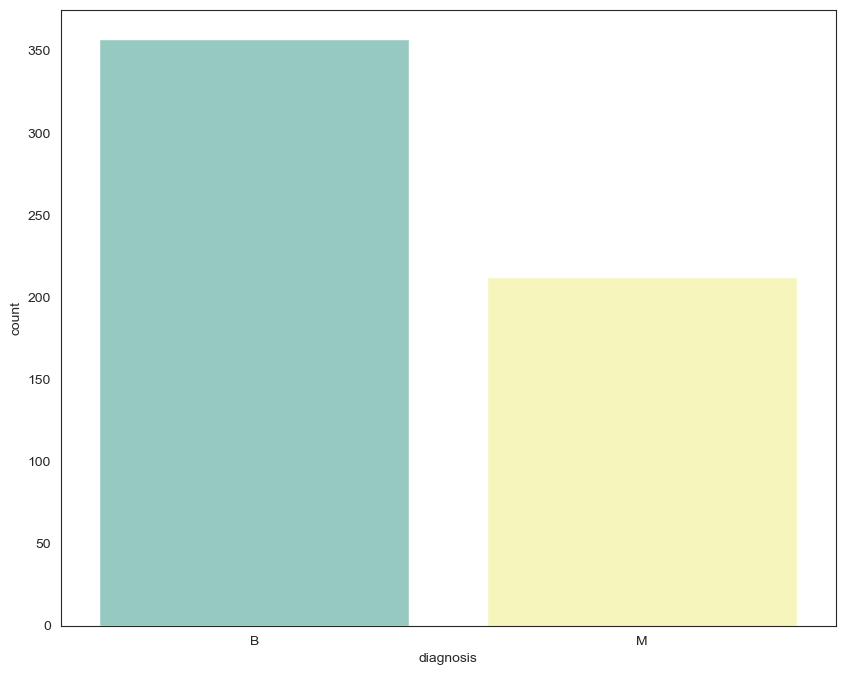

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Cleaned Data(with ids).csv")  # Load your DataFrame from a CSV file or any other source

# Convert 'diagnosis' column to categorical type
df['diagnosis'] = df['diagnosis'].astype('category')

# Now you can plot using sns.countplot
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data=df, x='diagnosis', label='Count', palette="Set3")


## 2.3.1 Visualise distribution of data via histograms
Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.


Separate columns into smaller dataframes to perform visualization

In [ ]:
#Break up columns into groups, according to their suffix designation
#(_mean, _se,and __worst) to perform visualisation plots off.
#Join the 'ID' and 'Diagnosis' back on
df_id_diag=df.loc[:,["id","diagnosis"]]
df_diag=df.loc[:,["diagnosis"]]

#For a merge + slice:
df_mean=df.iloc[:,1:11]
df_se=df.iloc[:,11:22]
df_worst=df.iloc[:,23:]

print(df_id_diag.columns)
#print(data_mean.columns)
#print(data_se.columns)
#print(data_worst.columns)

Index(['id', 'diagnosis'], dtype='object')


Histogram the _mean suffix designition

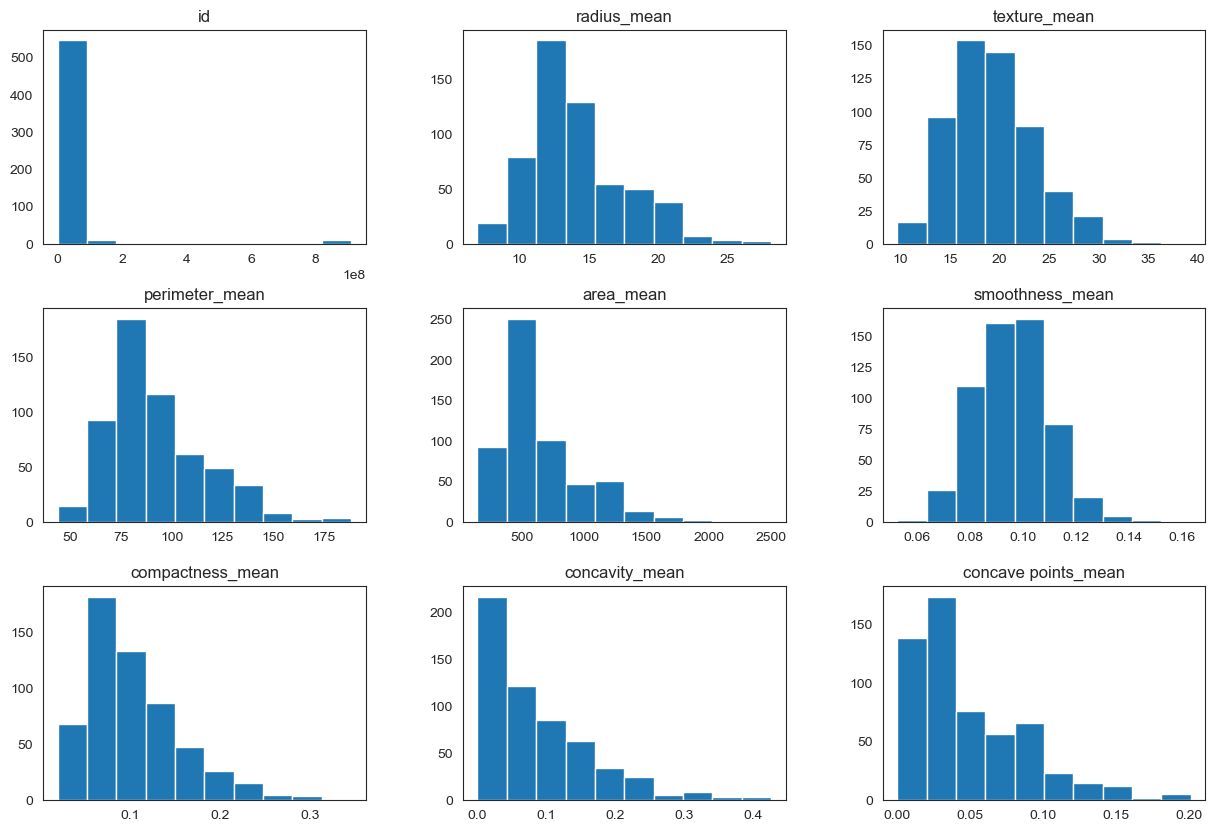

In [ ]:
#Plot histograms of CUT1 variables
hist_mean=df_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

Histogram for the _se suffix designition

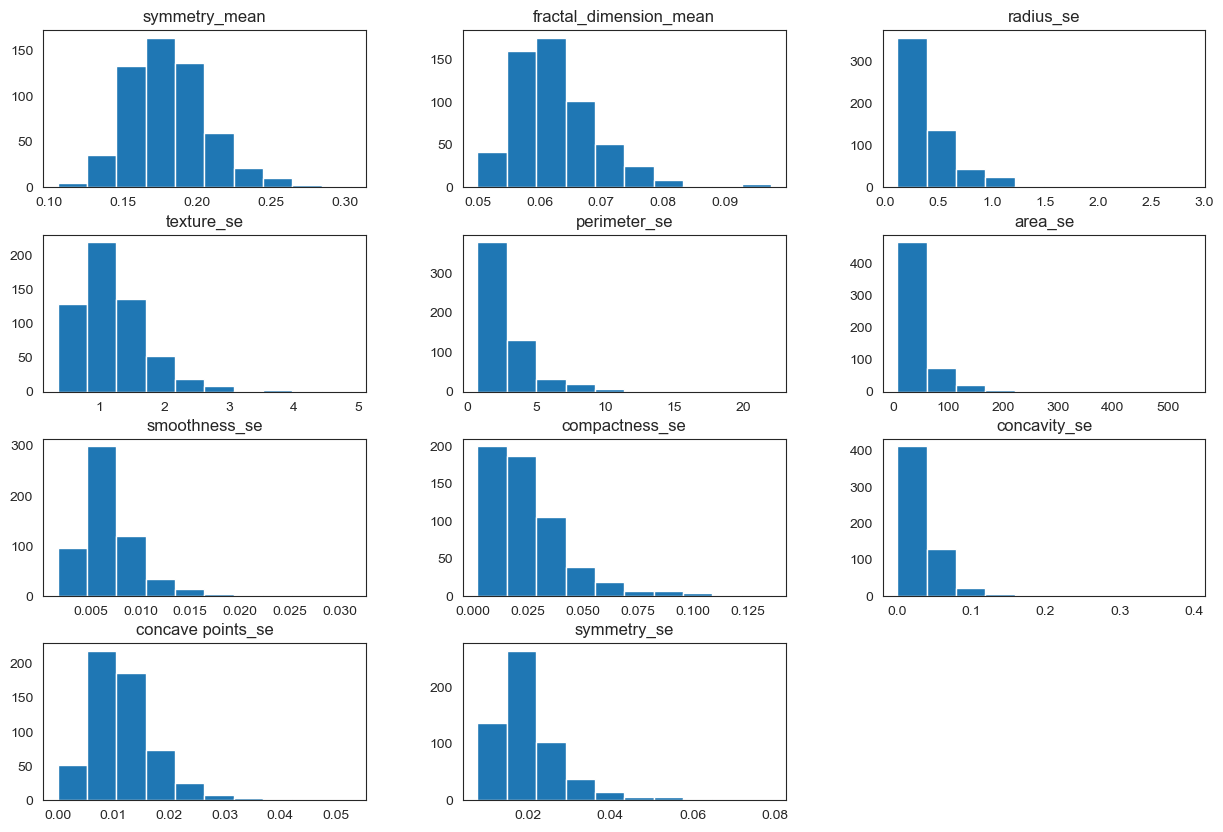

In [ ]:
#Plot histograms of _se variables
hist_se=df_se.hist(bins=10, figsize=(15, 10),grid=False,)

In [ ]:
Histogram _worst suffix designition

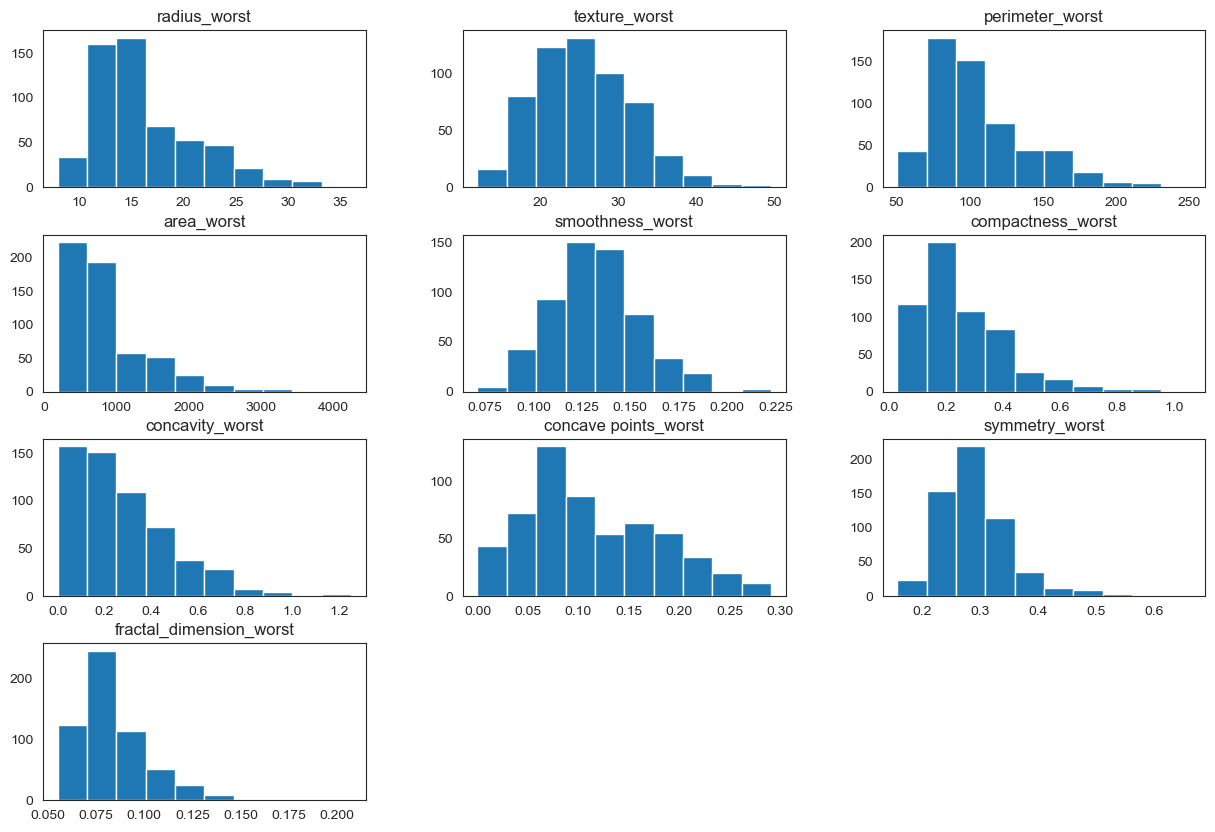

In [ ]:
#Plot histograms of _worst variables
hist_worst=df_worst.hist(bins=10, figsize=(15, 10),grid=False,)

Observation
We can see that perhaps the attributes concavity,and **concavity_point ** may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

## **2.3.2 Visualize distribution of data via density plots**

Density plots _mean suffix designition

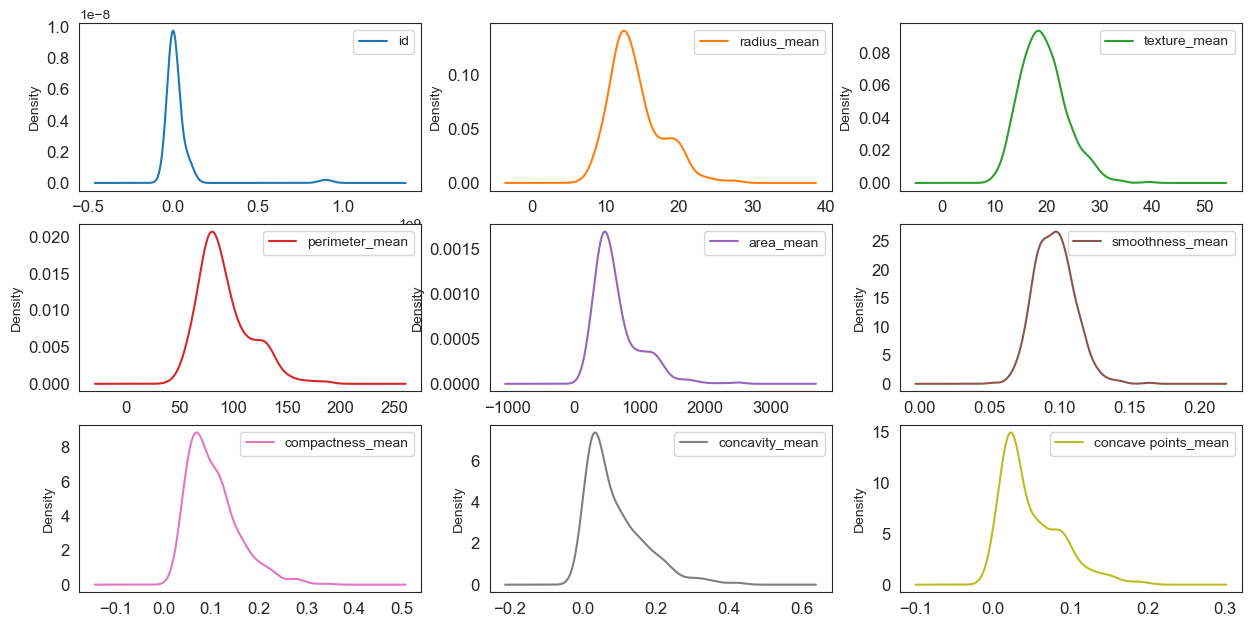

In [ ]:
#Density Plots
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False, fontsize=12, figsize=(15,10))

Density plots _se suffix designition

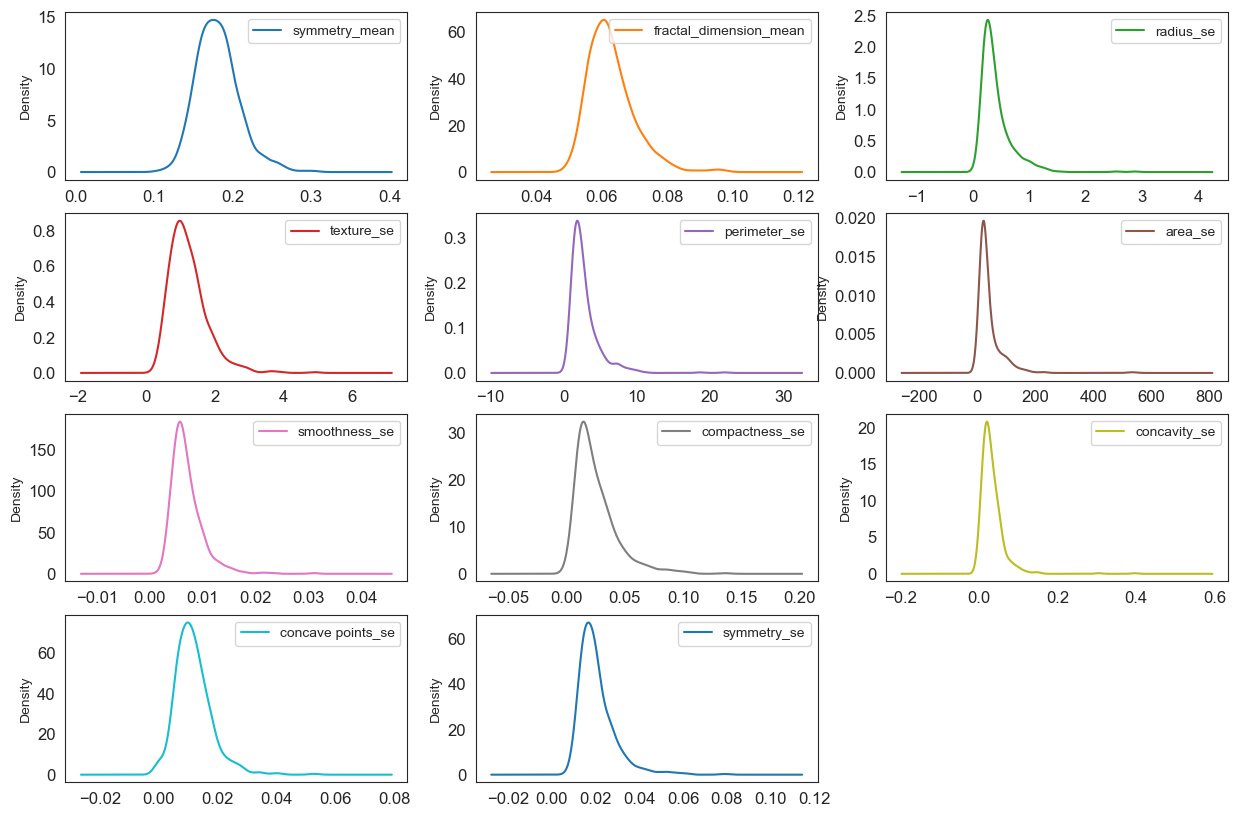

In [ ]:
#Density Plots
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                    sharey=False, fontsize=12, figsize=(15,10))

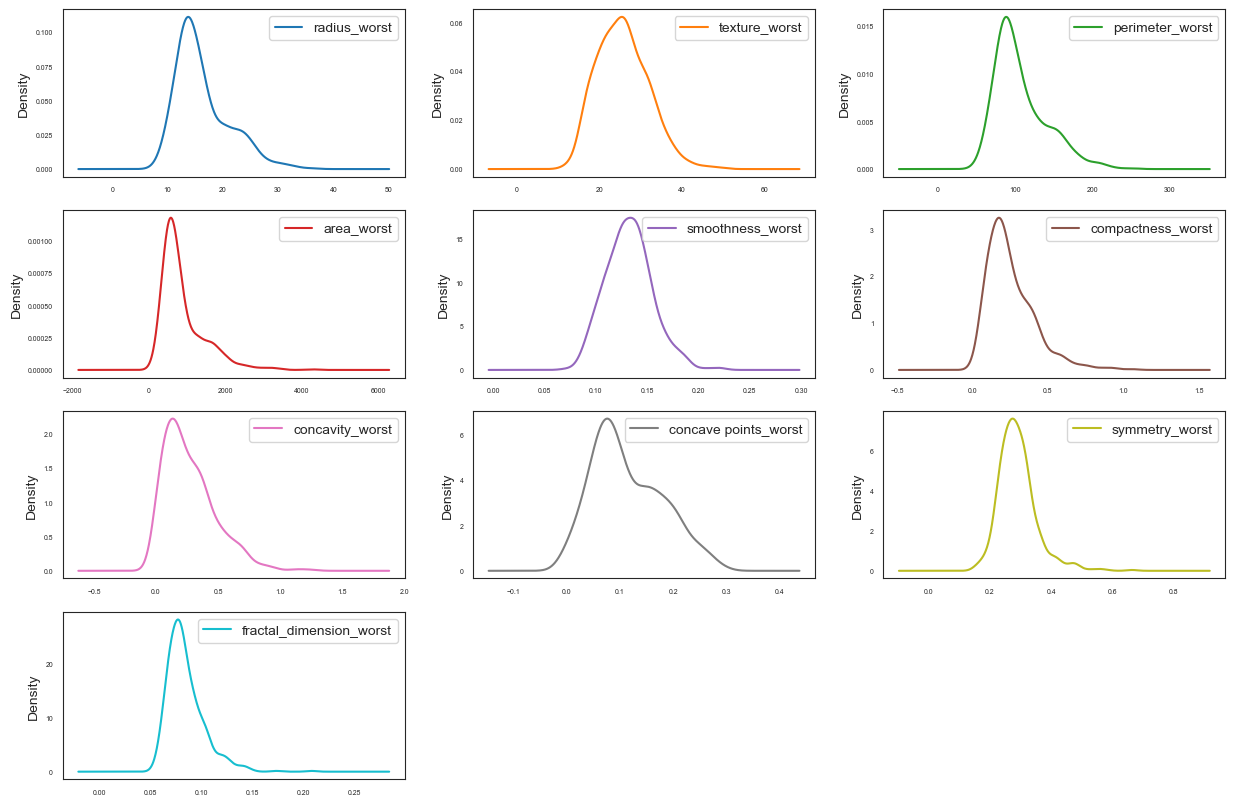

In [ ]:
#Density Plots
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,
                    fontsize=5, figsize=(15,10))

### **Observation**
> We can see that perhaps the attributes perimeter,radius, area, concavity, compactness may have an exponential distribution( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.



## 2.3.3 Visualise distribution of data via box plots

Box plot _mean suffix designition

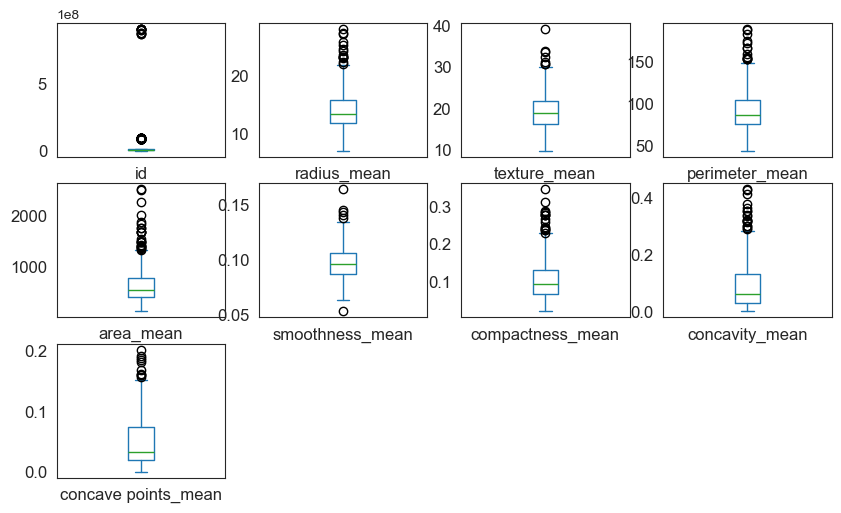

In [ ]:
# box and whisker plots
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12)


Box plot _se suffix designition

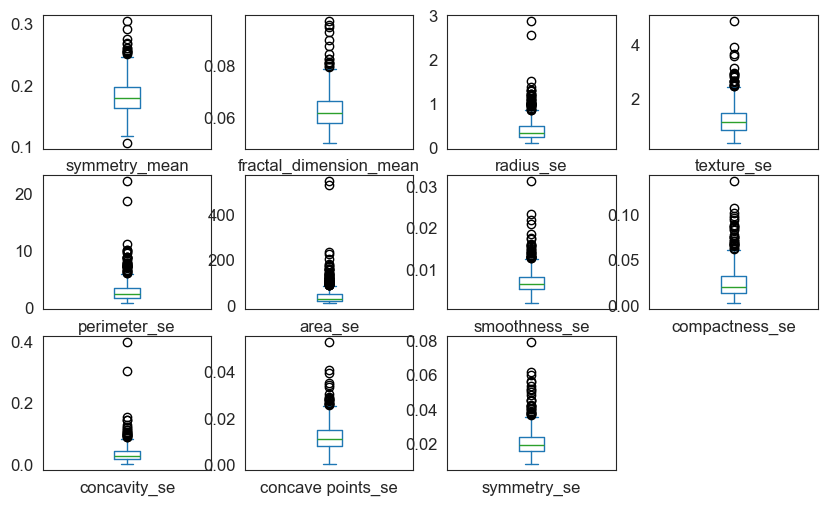

In [ ]:
# box and whisker plots
plt=df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
               fontsize=12)

Box plot _worst suffix designition

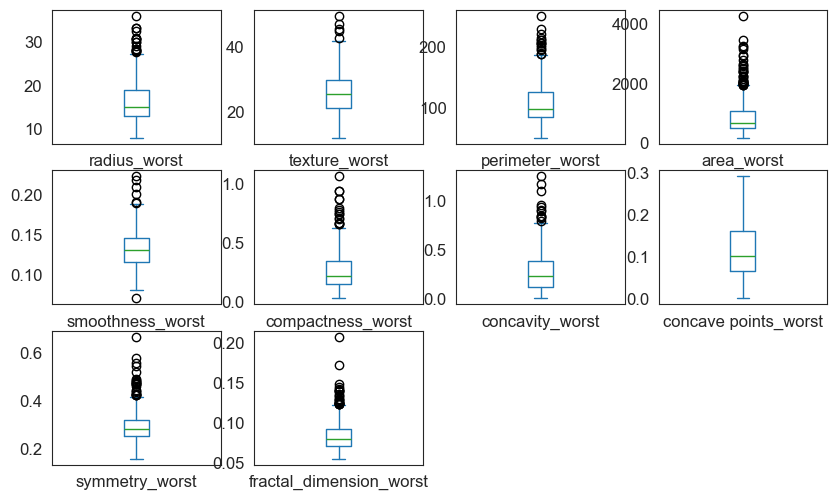

In [ ]:
# box and whisker plots
plt=df_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                  fontsize=12)

### **Observation**
> We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.



## **2.4 Multimodal Data Visualizations**

- Scatter plots
- Correlation matrix

### Correlation matrix

#**4: Predictive model using Support Vector Machine (SVM)**

Support vector machines (SVMs) learning algorithm will be used to build the predictive model. SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995).

Kernelized support vector machines are powerful models and perform well on a variety of datasets.

SVMs allow for complex decision boundaries, even if the data has only a few features.

They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples.

Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.

SVMs requires careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications.

SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.

# **Important Parameters**

The important parameters in kernel SVMs are the

Regularization parameter C,
The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
Kernel-specific parameters.
gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# visualization
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

In [ ]:
df = pd.read_csv(r"C:\Users\KIIT\Downloads\Cleaned Data(with ids).csv", index_col=False)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features and target variable
X = df.iloc[:, 1:31]  # Assuming columns 1 to 30 are features
y = df.iloc[:, 0]     # Assuming column 0 is the target

# Drop any non-numeric columns
X_numeric = X.select_dtypes(include=['number'])

# Transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs = scaler.fit_transform(X_numeric)


# **Classification with cross-validation**

Splitting the data into test and training sets is crucial to avoid overfitting. This allows generalization of real, previously-unseen data. Cross-validation extends this idea further. Instead of having a single train/test split, we specify so-called folds so that the data is divided into similarly-sized folds.

Training occurs by taking all folds except one – referred to as the holdout sample.

On the completion of the training, you test the performance of your fitted model using the holdout sample.

The holdout sample is then thrown back with the rest of the other folds, and a different fold is pulled out as the new holdout sample.

Training is repeated again with the remaining folds and we measure performance using the holdout sample. This process is repeated until each fold has had a chance to be a test or holdout sample.

The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample.

This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

# Check the class distribution in y to identify any imbalance issues
unique_classes, class_counts = np.unique(y, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} samples")

# Filter out classes with less than two samples
valid_classes = unique_classes[class_counts >= 2]
valid_indices = np.isin(y, valid_classes)
X_valid = Xs[valid_indices]
y_valid = y[valid_indices]

# Check if there are enough samples for splitting
if len(X_valid) < 2:
    print("There are not enough samples for splitting after filtering.")
else:
    # Split the filtered data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=2, stratify=y_valid)

    # Create an SVM classifier and train it on the training data
    clf = SVC(probability=True)
    clf.fit(X_train, y_train)

    # Evaluate the classifier's accuracy on the test data
    classifier_score = clf.score(X_test, y_test)
    print('\n➔ The classifier accuracy score is {:.2f}\n'.format(classifier_score))


Class 0: 1 samples
Class 1: 1 samples
Class 2: 1 samples
Class 3: 1 samples
Class 4: 1 samples
Class 5: 1 samples
Class 6: 1 samples
Class 7: 1 samples
Class 8: 1 samples
Class 9: 1 samples
Class 10: 1 samples
Class 11: 1 samples
Class 12: 1 samples
Class 13: 1 samples
Class 14: 1 samples
Class 15: 1 samples
Class 16: 1 samples
Class 17: 1 samples
Class 18: 1 samples
Class 19: 1 samples
Class 20: 1 samples
Class 21: 1 samples
Class 22: 1 samples
Class 23: 1 samples
Class 24: 1 samples
Class 25: 1 samples
Class 26: 1 samples
Class 27: 1 samples
Class 28: 1 samples
Class 29: 1 samples
Class 30: 1 samples
Class 31: 1 samples
Class 32: 1 samples
Class 33: 1 samples
Class 34: 1 samples
Class 35: 1 samples
Class 36: 1 samples
Class 37: 1 samples
Class 38: 1 samples
Class 39: 1 samples
Class 40: 1 samples
Class 41: 1 samples
Class 42: 1 samples
Class 43: 1 samples
Class 44: 1 samples
Class 45: 1 samples
Class 46: 1 samples
Class 47: 1 samples
Class 48: 1 samples
Class 49: 1 samples
Class 50: 

To get a better measure of prediction accuracy (which you can use as a proxy for “goodness of fit” of the model), you can successively split the data into folds that you will use for training and testing:

In [ ]:
print (scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print ("➔ Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.90526316 0.94210526 0.92063492]
➔ Average score and uncertainty: (92.27 +- 0.872)%


From the above results, you can see that only a fraction of the features are required to build a model that performs similarly to models based on using the entire set of features. Feature selection is an important part of the model-building process that you must always pay particular attention to. The details are beyond the scope of this notebook. In the rest of the analysis, you will continue using the entire set of features.

# **Model Accuracy: Receiver Operating Characteristic (ROC) curve**

In statistical modeling and machine learning, a commonly-reported performance measure of model accuracy for binary classification problems is Area Under the Curve (AUC).

To understand what information the ROC curve conveys, consider the so-called confusion matrix that essentially is a two-dimensional table where the classifier model is on one axis (vertical), and ground truth is on the other (horizontal) axis, as shown below. Either of these axes can take two values (as depicted)

Model says "+" |Model says "-" --- | --- | --- True positive | False negative | ** Actual: "+" ** False positive | True negative | Actual: "-" In an ROC curve, you plot “True Positive Rate” on the Y-axis and “False Positive Rate” on the X-axis, where the values “true positive”, “false negative”, “false positive”, and “true negative” are events (or their probabilities) as described above. The rates are defined according to the following:

True positive rate (or sensitivity)}: tpr = tp / (tp + fn)
False positive rate: fpr = fp / (fp + tn)
True negative rate (or specificity): tnr = tn / (fp + tn)
In all definitions, the denominator is a row margin in the above confusion matrix. Thus,one can express

the true positive rate (tpr) as the probability that the model says "+" when the real value is indeed "+" (i.e., a conditional probability). However, this does not tell you how likely you are to be correct when calling "+" (i.e., the probability of a true positive, conditioned on the test result being "+").

In [ ]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)

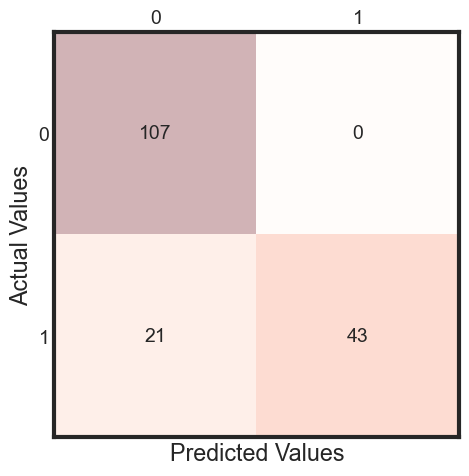

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       107
           1       1.00      0.67      0.80        64

    accuracy                           0.88       171
   macro avg       0.92      0.84      0.86       171
weighted avg       0.90      0.88      0.87       171



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

### Observation

In [ ]:
There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence).

*The classifier made a total of 174 predictions (i.e 174 patients were being tested for the presence breast cancer).
*Out of those 174 cases, the classifier predicted "yes" 58 times, and "no" 113 times.
*In reality, 64 patients in the sample have the disease, and 107 patients do not.

**Rates as computed from the confusion matrix**

In [ ]:
Accuracy: Overall, how often is the classifier correct?

(TP+TN)/total = (57+106)/171 = 0.95
Misclassification Rate: Overall, how often is it wrong?

(FP+FN)/total = (1+7)/171 = 0.05 equivalent to 1 minus Accuracy also known as "Error Rate"
True Positive Rate: When it's actually yes, how often does it predict 1?

TP/actual yes = 57/64 = 0.89 also known as "Sensitivity" or "Recall"
False Positive Rate: When it's actually 0, how often does it predict 1?

FP/actual no = 1/107 = 0.01
Specificity: When it's actually 0, how often does it predict 0? also know as true positive rate

TN/actual no = 106/107 = 0.99 equivalent to 1 minus False Positive Rate
Precision: When it predicts 1, how often is it correct?

TP/predicted yes = 57/58 = 0.98
Prevalence: How often does the yes condition actually occur in our sample?

actual yes/total = 64/171 = 0.34

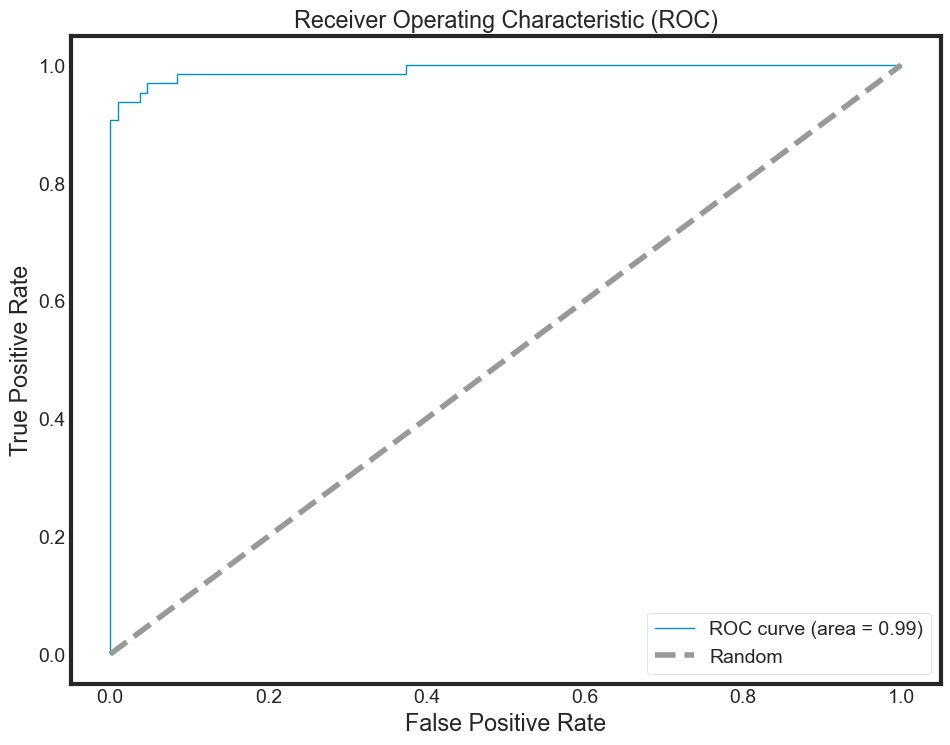

In [ ]:
# Create an SVC classifier with probability estimates enabled
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Plot the receiver operating characteristic curve (ROC)
plt.figure(figsize=(10, 8))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


To interpret the ROC correctly, consider what the points that lie along the diagonal represent. For these situations, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply, the classification model is random.

For the points above the diagonal, tpr > fpr, and the model says that you are in a zone where you are performing better than random. For example, assume tpr = 0.99 and fpr = 0.01, Then, the probability of being in the true positive group is (0.99/(0.99+0.11))=99%
Furthermore, holding fpr constant, it is easy to see that the more vertically above the diagonal you are positioned, the better the classification model.

# **5: Optimizing the SVM Classifier**

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this part, we'll aim to tune parameters of the SVM Classification model using scikit-learn.

### Load Libraries and Data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

# visualization
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")
plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

## Build a predictive model and evaluate with 5-cross validation using support vector classifies

In [ ]:
X

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087



The classifier accuracy score is 0.96

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



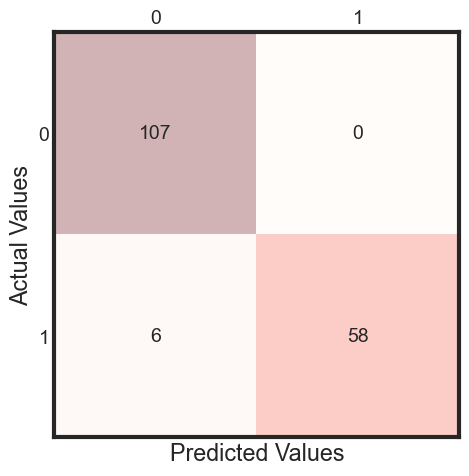

In [ ]:
# Load the dataset and preprocess it
df = pd.read_csv(r"C:\Users\KIIT\Downloads\Cleaned Data(with ids).csv", index_col=False)
df.drop('Unnamed: 0', axis=1, inplace=True)

# Assign predictors to a variable of ndarray (matrix) type
X = df.drop(columns=['diagnosis'])  # Assuming 'diagnosis' is the target variable
y = df['diagnosis']

# Transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Perform PCA for feature extraction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(Xs)

# Divide records into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the dataset
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))

# Cross-validation with feature selection
clf2 = make_pipeline(SelectKBest(f_regression, k=3), SVC(probability=True))
scores = cross_val_score(clf2, X_pca, y, cv=3)

# Get average of 5-fold cross-validation score using an SVC estimator
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))

# Predict on the test set and print classification report
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


# **Importance of optimizing a classifier**

We can tune two key parameters of the SVM algorithm:

the value of C (how much to relax the margin)
and the type of kernel.
The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

Python scikit-learn provides two simple methods for algorithm parameter tuning:

Grid Search Parameter Tuning.
Random Search Parameter Tuning.

In [ ]:
# Train classifiers.
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 0.98


In [ ]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.92      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



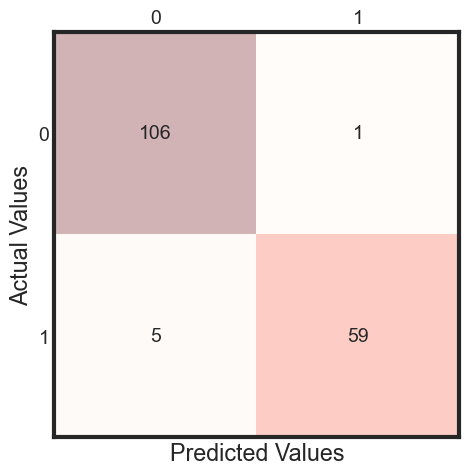

In [ ]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

# **Decision boundaries of different classifiers**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

#================================================================
# Create color maps
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# we create an instance of SVM and fit out data.
# We do not scale ourdata since we want to plot the support vectors
#================================================================

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['axes.titlesize'] = 'large'

    # create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

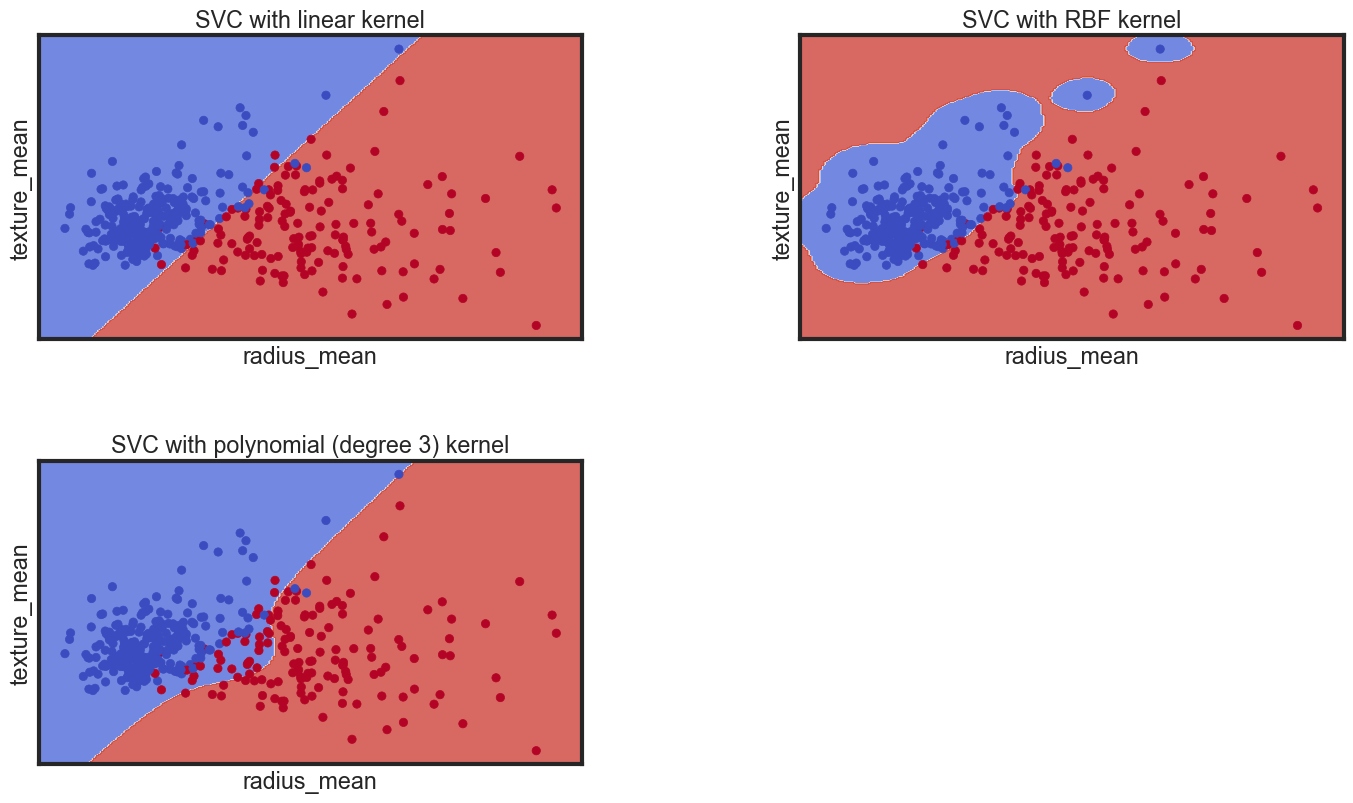

In [ ]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### **Conclusion**

This work demonstrates the modelling of breast cancer as classification task using Support Vector Machine

The SVM performs better when the dataset is standardized so that all attributes have a mean value of zero and a standard deviation of one. We can calculate this from the entire training dataset and apply the same transform to the input attributes from the validation dataset.

### next task Section 6
>asdfghjk
1. abc
2. abc
   - 2345
   - 3456
`tree.DecisionTreeClassifier()`

## Next Task: ##
1. Summary and conclusion of findings
2. In Comparsion with other classification methods. This study explored the performance of various classification methods on our dataset, including:
- Decision trees using `tree.DecisionTreeClassifier()`
- K-nearest neighbors using `neighbors.KNeighborsClassifier()`
- Random forests using `ensemble.RandomForestClassifier()`
- Perceptron using `mlxtend.classifier.Perceptron`
- Multilayer perceptron network using `mlxtend.classifier.MultiLayerPerceptron`

Through comprehensive evaluation, we gained insights into the strengths and weaknesses of each method in classifying the data.



# Section 6: Automate the ML process using pipelines #

Standard procedures exist within machine learning projects that can be automated. Within Python's scikit-learn framework, Pipelines serve to distinctly outline and automate these processes.

 - Pipelines effectively address typical challenges such as data leakage in your testing framework.
 - The scikit-learn library furnishes a Pipeline tool to facilitate the automation of machine learning workflows.
 - Pipelines function by permitting a sequential progression of data transformations to be linked together, leading to a modeling procedure that is ultimately assessable.

## Data Preparation and Modeling Pipeline ##

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a pipeline that standardizes the data then creates a model
#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# visualization
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

## Evaluate Some Algorithms ##

Now, let's proceed to create models for the data and assess their accuracy on unseen data. Here's an outline of what we'll be doing in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build 5 different models
4. Select the best model

## Dataset Validation ##

In [ ]:
#load data
df = pd.read_csv(r"C:\Users\KIIT\Downloads\Data_cleaned.csv", index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

# Split-out validation dataset
array = df.values
X = array[:,1:31]
y = array[:,0]

# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

## Evaluate Algorithms: Baseline ##

In [ ]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=5000, solver='saga')))  # Increased max_iter and changed solver
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

print('\n➔ 10-Fold cross-validation accuracy score for the training data for six classifiers')


LR: 0.917115 (0.038827)
LDA: 0.954744 (0.018784)
KNN: 0.937179 (0.028218)
CART: 0.924679 (0.043382)
NB: 0.937115 (0.040822)
SVM: 0.901987 (0.047020)

➔ 10-Fold cross-validation accuracy score for the training data for six classifiers


In [ ]:
len(X_train)

398

### Observation ###

> The findings imply that both Logistic Regression and LDA warrant additional investigation. However, it's essential to note that these are merely mean accuracy scores. It's advisable to examine the distribution of accuracy values computed across cross-validation folds. This can be visualized using box and whisker plots.

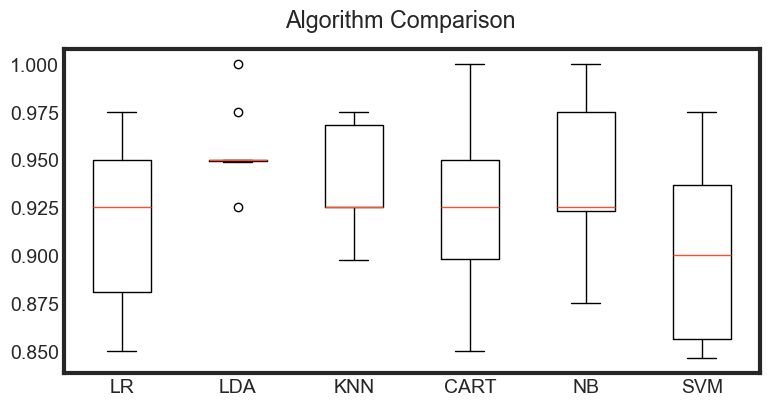

In [ ]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Observation ###

> The outcomes reveal a consistent and narrow distribution across all classifiers, except for SVM, which is promising as it suggests low variance. The satisfactory performance of SVM is noteworthy.

>The diverse distribution of attributes might influence the accuracy of algorithms like SVM. In the subsequent section, we will perform the same spot-check using a standardized version of the training dataset.

## 6.1 Evaluate Algorithms: Standardize Data ##

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
      scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.974936 (0.015813)
ScaledLDA: 0.954744 (0.018784)
ScaledKNN: 0.957372 (0.033665)
ScaledCART: 0.914615 (0.032006)
ScaledNB: 0.937115 (0.039261)
ScaledSVM: 0.967436 (0.027483)


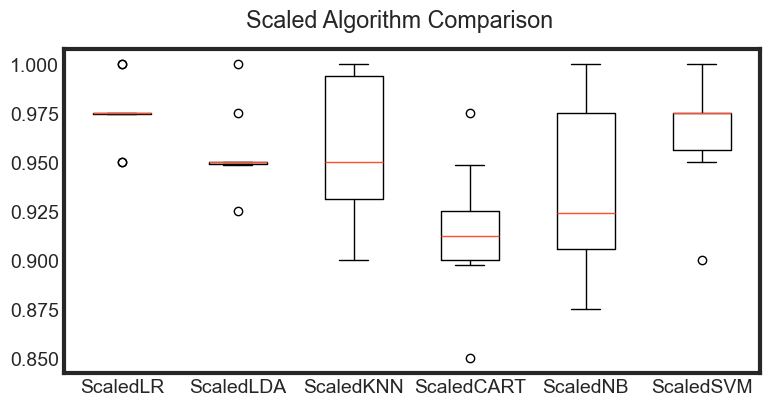

In [ ]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Observation ###

> The findings indicate that data standardization has enhanced the performance of SVM, making it the most accurate algorithm among those tested.

> Further exploration of the SVM, LDA, and LR algorithms is recommended. There's a strong possibility that adjusting configurations beyond the default settings could lead to even more accurate models.

## 6.2 Algorithm Tuning ##

In this segment, we delve into tuning the parameters for three promising algorithms identified from the spot-checking in the previous section: LR, LDA, and SVM.








### Tuning hyper-parameters - SVC estimator ###

In [ ]:
#Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train, y_train)

#print('➝ Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('➔ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=1)
gs = gs.fit(X_train, y_train)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)

➔ Model Training Accuracy: 0.940 +/- 0.034
➔ Tuned Parameters Best Score:  0.9446794871794871
➔ Best Parameters: 
 {'clf__C': 1.0, 'clf__kernel': 'linear'}


## Finalize Model ##

In [ ]:
#Use best parameters
clf_svc = gs.best_estimator_

#Get Final Scores
clf_svc.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

print('➔ Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('➜ Final Accuracy on Test set: %.5f' % clf_svc.score(X_test,y_test))

➔ Final Model Training Accuracy: 0.945 +/- 0.041
➜ Final Accuracy on Test set: 0.97076


In [ ]:
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9707602339181286
[[114   2]
 [  3  52]]
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       116
           M       0.96      0.95      0.95        55

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## Summary ##

Worked through a classification predictive modeling machine learning problem from end-to-end using Python. Here are the specific steps undertaken:

1. Defined the Problem (Utilizing Breast Cancer data).
2. Loaded the Dataset.
3. Analyzed the Data (Noted similar scales but differing data distributions).
   - Assessed Algorithms (KNN showed promise).
   - Assessed Algorithms with Standardization (Both KNN and SVM showed promise).
4. Tuned Algorithms (Optimal parameters: K=19 for KNN, SVM with an RBF kernel and C=100).
5. Finalized the Model (Utilized all training data and validated using a separate validation dataset).